In [13]:
# 1. Load Liabiaries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [14]:
# reading files
df=pd.read_csv("Melbourne_housing_data.csv")
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [15]:
# List of column names 
cols_to_use=['Suburb', 'Rooms', 'Type', 'Method', 'SellerG',
             'Regionname', 'Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
             'Landsize', 'BuildingArea', 'Price']
df=df[cols_to_use]

# Missing value

In [16]:
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)

df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(27244, 14)

# outlier Handling 

<Axes: xlabel='Rooms'>

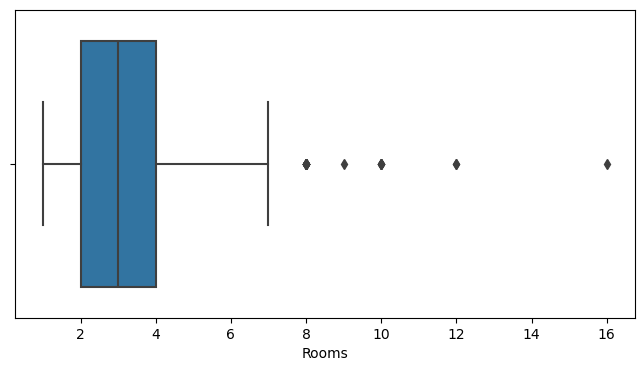

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.boxplot(x='Rooms', data=df,orient='h')

In [20]:
from scipy import stats

q1=df['Rooms'].quantile(q=0.25)
q3=df['Rooms'].quantile(q=0.75)
# Calculating the interquartile range (IQR)
IQR= q3-q1
print('1st quartile ={} \n3rd quartile range={} \ninter quartile range={}'.format(q1,q3,stats.iqr(df['Rooms'])))

1st quartile =2.0 
3rd quartile range=4.0 
inter quartile range=2.0


In [21]:
# Calculating lower & upper bound for outliers
lower_outlier=q1-1.5*(IQR)
upper_outlier=q3+1.5*(IQR)

print('lower outlier= ', lower_outlier)
print('upper outlier= ', upper_outlier)

lower outlier=  -1.0
upper outlier=  7.0


In [22]:
print('Number of upper outlier= ', 
      df[df['Rooms']>upper_outlier]['Rooms'].count())
print('Number of lower outlier= ', 
      df[df['Rooms']<lower_outlier]['Rooms'].count())

Number of upper outlier=  23
Number of lower outlier=  0


In [23]:
# Replacing outliers with the median value of 'Rooms'
df.loc[(df['Rooms']<lower_outlier) | (df['Rooms']>upper_outlier),['Rooms']] = df['Rooms'].median()

In [24]:
print('Number of upper outlier= ', df[df['Rooms']>upper_outlier]['Rooms'].count())
print('Number of lower outlier= ', df[df['Rooms']<lower_outlier]['Rooms'].count())

Number of upper outlier=  0
Number of lower outlier=  0


<Axes: xlabel='Rooms'>

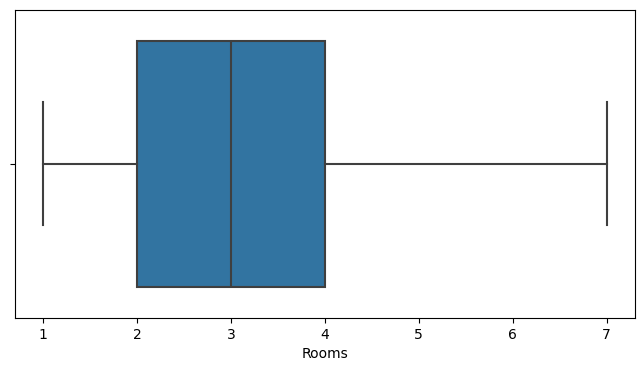

In [25]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Rooms', data=df, orient='h')

In [26]:
for cols in df.columns[:-1]:
    if df[cols].dtype == object:
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3 - Q1
    
        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()

<Axes: xlabel='BuildingArea'>

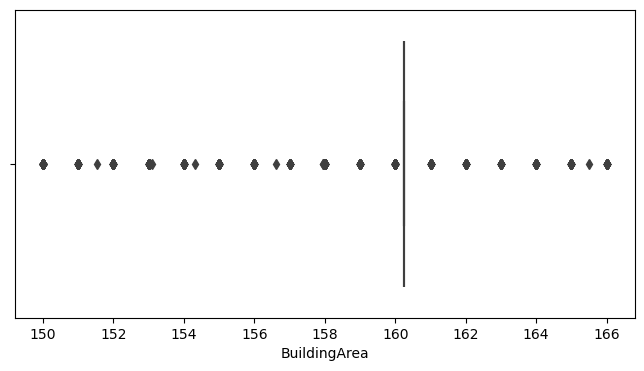

In [28]:
plt.figure(figsize=(8,4))
# Create a horizontal boxplot for the 'BuildingArea' column
sns.boxplot(x='BuildingArea', data=df,orient='h')

In [30]:
print(df.shape)
# Droping non-numerical columns 
df1_num_col=df.drop(['Car','Suburb', 'Type','Method','SellerG', 'Regionname', 'Price'], axis=1)
print(df1_num_col.shape)
df1_num_col.head()

(27244, 14)
(27244, 7)


,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Landsize,BuildingArea
1,2,4019.0,2.5,2.0,1.0,202.0,160.2564
2,2,4019.0,2.5,2.0,1.0,156.0,160.2564
4,3,4019.0,2.5,3.0,2.0,134.0,150.0000
5,3,4019.0,2.5,3.0,2.0,94.0,160.2564
6,4,4019.0,2.5,3.0,1.0,120.0,160.2564


In [31]:
# One-hot encoding for categorical columns
df_cat= pd.get_dummies(df, drop_first= True)
print(df_cat.shape)

(27244, 713)


In [32]:
df=pd.concat([df1_num_col,df_cat],axis=1)
df.shape

(27244, 720)

# Data Standardization

In [33]:
# Create the feature matrix X by dropping the 'Price' column
# Create the target variable y, using only the 'Price' column
X= df.drop('Price',axis=1)
y=df['Price']
print(X.shape)
print(y.shape)

(27244, 719)
(27244,)


In [34]:
from sklearn.preprocessing import StandardScaler
#define min max scaler
scaler= StandardScaler()
#transform data
scaled=scaler.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
# Spliting the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=40)

In [38]:
from sklearn.linear_model import LinearRegression

# Creating a linear regression model and fit it to the training data
reg = LinearRegression().fit(X_train, y_train)
# Making predictions on the test & testing set
Reg_predict=reg.predict(X_test)
Reg_predict_train=reg.predict(X_train)

In [39]:
from sklearn import metrics
# Calculating and print R-squared score for the test set
# Calculating and print mean squared error (MSE) for the test set
print("R score",metrics.r2_score(y_test,Reg_predict))
print("R score",metrics.r2_score(y_train,Reg_predict_train))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))


R score -9.192663192809993e+26
R score 0.6778666959333708
MSE =  3.8074481633240254e+38


In [47]:
LR=LinearRegression()
# Instantiate the Linear Regression model

In [48]:
LR.fit(X_train,y_train)
# Fit the model to the training data

LinearRegression()

In [49]:
ypred=LR.predict(X_test)
# Make predictions on the testing set

In [50]:
yp=LR.predict(X_train)
# Make predictions on the training set

In [51]:
from sklearn.metrics import r2_score
# Calculating R-squared scores for training and test sets

In [45]:
r2_score(y_test,ypred)

-9.192663192809993e+26

In [46]:
r2_score(y_train,yp)

0.6778666959333708

# lasso

In [72]:
# Import Lasso 
from sklearn.linear_model import Lasso
lasso_reg=Lasso()
# Create and Fit Lasso Regression
lasso_reg.fit(X_train, y_train)
# Make Predictions on Training and Test Sets
y_pred_lasso_train=lasso_reg.predict(X_train)
y_pred_lasso_test=lasso_reg.predict(X_test)

In [75]:
# Calculating R-squared scores for training and test sets
lasso_reg.score(X_test,y_test)

0.6673661331684886

In [76]:
lasso_reg.score(X_train,y_train)

0.6790460706567882

# Ridge 

In [ ]:
# Import Ridege
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
# Create and Fit Ridge Regression
ridge_reg.fit(X_train,y_train)

In [ ]:
# Calculating R-squared scores for training and test sets
ridge_reg.score(X_test,y_test)

In [ ]:
ridge_reg.score(X_train,y_train)

# Elastic Net

In [ ]:
# Import ElasticNet
from sklearn.linear_model import ElasticNet
en_reg=ElasticNet()
# Create and Fit ElasticNet Regression
en_reg.fit(X_train,y_train)

In [ ]:
# Calculating R-squared scores for training and test sets
en_reg.score(X_test,y_test)

In [ ]:
en_reg.score(X_train,y_train)

In [273]:
X.shape

(27244, 719)

ypred=model.predict(np.array[0.....718])

# simple regression

In [126]:
X= df['Rooms'].iloc[:,:-1].values
y= df['Price'].values
print(X.shape)
print(y.shape)

(27244, 1)
(27244,)


In [62]:
from sklearn.preprocessing import StandardScaler
#define min max scaler
scaler= StandardScaler()
#transform data
scaled=scaler.fit_transform(X)

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=40)

In [64]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test)
Reg_predict_train=reg.predict(X_train)

In [65]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,Reg_predict))
print("MSE test = ", metrics.mean_squared_error(y_test,Reg_predict))

print("R score",metrics.r2_score(y_train,Reg_predict_train))
print("MSE train= ", metrics.mean_squared_error(y_train,Reg_predict_train))

R score -9.192663192809993e+26
MSE test =  3.8074481633240254e+38
R score 0.6778666959333708
MSE train=  132336465413.12682


In [66]:
LR= LinearRegression()

In [67]:
LR.fit(X_train,y_train)

LinearRegression()

In [68]:
ypred=LR.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
mean_squared_error(y_test,ypred)

3.8074481633240254e+38

In [71]:
r2_score(y_test,ypred)

-9.192663192809993e+26